<a href="https://colab.research.google.com/github/TanishaSalian/MachineLearning_M606A/blob/main/E_Commerce_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

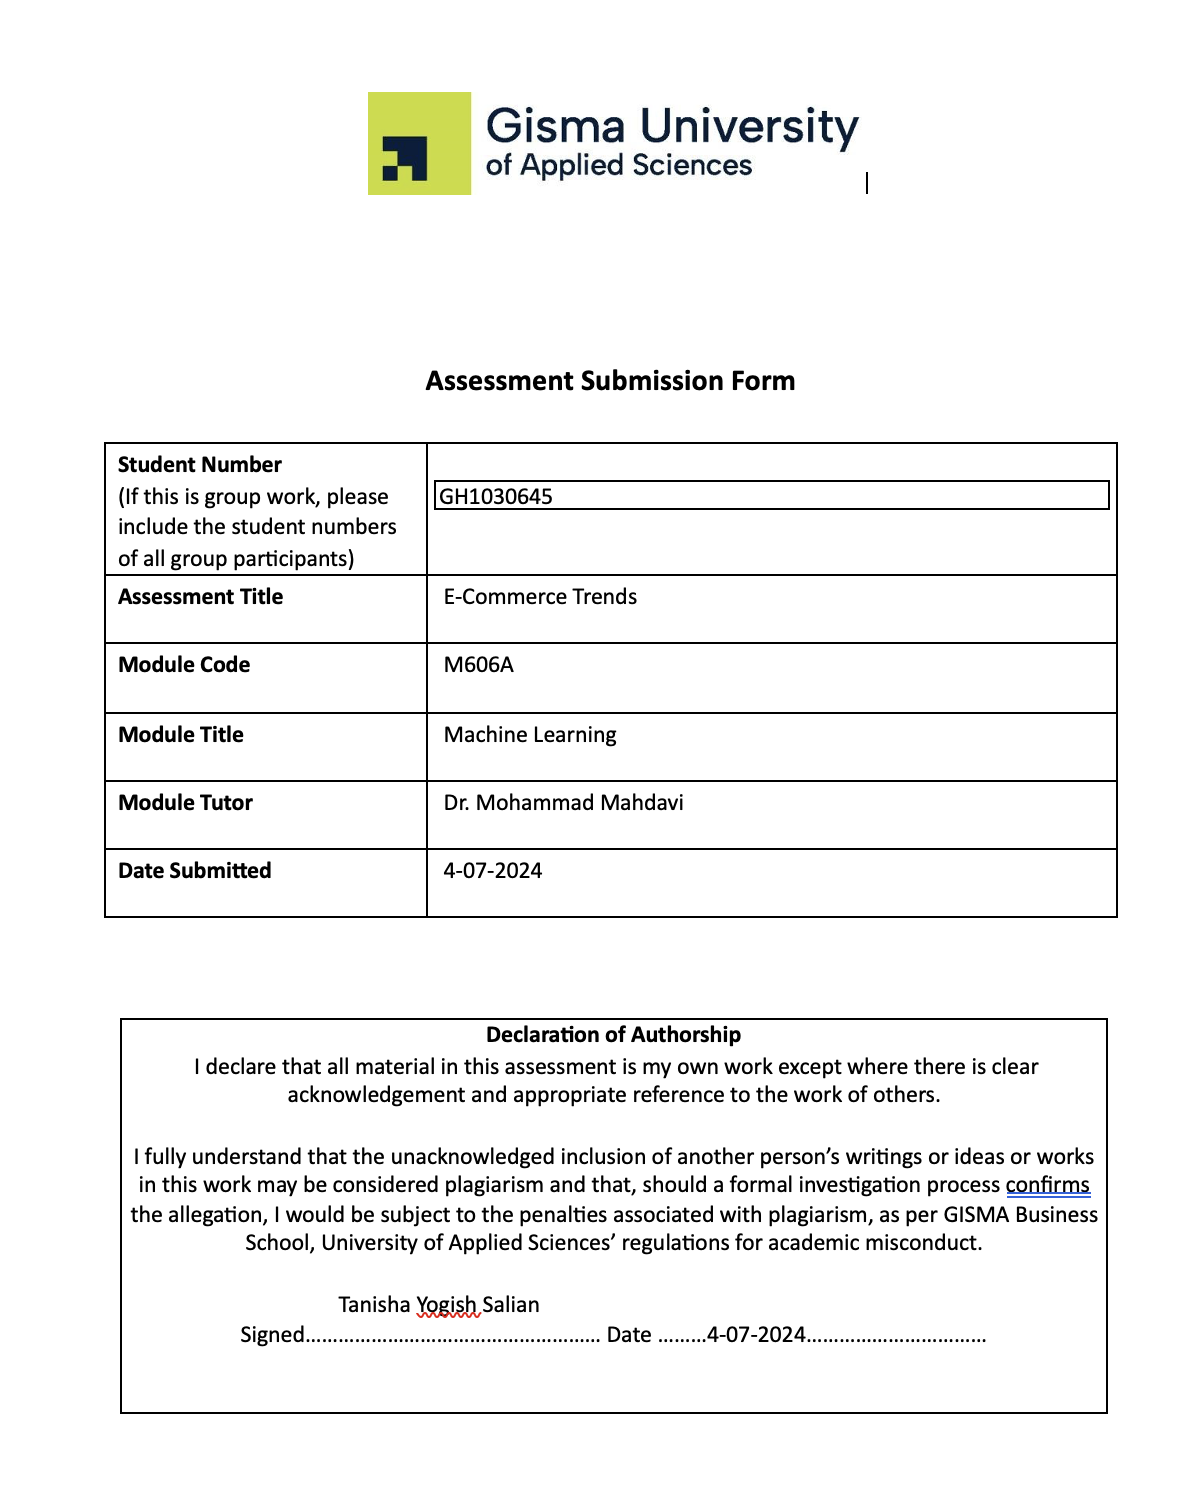

# **E-Commerce Trends**

Dataset link:https://www.kaggle.com/datasets/muhammadroshaanriaz/e-commerce-trends-a-guide-to-leveraging-dataset

Github Link:https://github.com/TanishaSalian/MachineLearning_M606A

Problem Statement: In today's world of e-commerce, understanding the customer's preferences, behavior can lead to valuable insights into decision making, pricing and marketing campagins

# **Import Libraries**

Libraries are crucial to build, train and utilize the machine learning models. They simplify the process and help in implementing sophisticated algorithms

In [126]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading the Dataset**

In [127]:
df= pd.read_csv("https://raw.githubusercontent.com/TanishaSalian/MachineLearning_M606A/main/ecommerce_product_dataset.csv")
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


The above code, is used to load the dataset in a Data Frame format from the given URL

The dataset, shows us the preview of the entire dataset and helps in knowing the concrete view of the structure

In [128]:
df['DateAdded']= pd.to_datetime(df['DateAdded'])
df['Year']= df['DateAdded'].dt.year
df['Month']=df['DateAdded'].dt.month
df=df.drop(['DateAdded'],axis=1)


In the given dataset, the column 'DateAdded' has been converted to datetime format and has been divided to 'Year' and 'Month' columns. The 'DateAdded' column has been dropped.

# **Splitting of Datasets**

In [129]:
training_data_, testing_data_ = train_test_split(df)
display('Total Size', df)
display('Training Data',training_data_.shape)
display('Testing Data',testing_data_.shape)


'Total Size'

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City,Year,Month
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,Albuquerque,2023,11
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,Queens,2023,9
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,Austin,2023,10
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,Dallas,2023,12
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,Tucson,2023,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Throw Blanket,Blankets,207.72,2.3,1973,16,0.46,325,Baton Rouge,2024,2
996,997,Fleece Blanket,Blankets,268.60,3.2,841,201,0.39,1546,Worcester,2023,7
997,998,Throw Blanket,Blankets,92.74,2.8,3454,880,0.02,1295,Raleigh,2023,10
998,999,Weighted Blanket,Blankets,152.28,1.3,2850,752,0.34,1962,Nashville,2023,10


'Training Data'

(750, 12)

'Testing Data'

(250, 12)

As we can seee from the above code that train_test_split function is used in order to segregate the dataset for training the models as well as testing them

# **Exploration of Data**

In [130]:
training_data_.isnull().sum()


ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
City             0
Year             0
Month            0
dtype: int64

In this function, the data is searched for any missung values

In [131]:
training_data_['Category'].unique()

array(['Electronics', 'Mobile phone accessories', 'Coats and jackets',
       'Art and crafting materials', 'Socks', 'Candles', 'Bicycles',
       'Vitamins and supplements', 'Nail care', 'Books',
       'Motor vehicle parts', 'Toys & Games', 'Clothing', 'Makeup',
       'Blankets', 'Cookware', 'Skin care', 'Bedsheets', 'Home & Kitchen',
       'Posters and artwork', 'Underwear', 'Perfume and cologne',
       'Bath and body', 'Wine', 'Drinkware'], dtype=object)

This code is used to serach for unique values


In [136]:
training_data_['Category'].value_counts()

Category
Bedsheets                     34
Wine                          34
Makeup                        34
Skin care                     32
Candles                       32
Bicycles                      32
Vitamins and supplements      32
Blankets                      32
Clothing                      31
Toys & Games                  31
Cookware                      31
Underwear                     31
Books                         31
Bath and body                 31
Socks                         31
Coats and jackets             31
Motor vehicle parts           30
Home & Kitchen                29
Posters and artwork           29
Mobile phone accessories      27
Perfume and cologne           26
Drinkware                     26
Nail care                     26
Art and crafting materials    26
Electronics                   21
Name: count, dtype: int64

Here the value count function is used to count the column 'Category'

# **Data Preprocesing**

# Splitting of attributes and Target group

In [143]:
x_train_= training_data_.drop(['Category'],axis=1)
y_train_= training_data_['Category']
x_test_= testing_data_.drop(['Category'],axis=1)
y_test_ = testing_data_['Category']


print('Training Size',x_test_.shape)
print('Testing Size',x_test_.shape)

x_train_.head()

Training Size (250, 11)
Testing Size (250, 11)


,ProductID,ProductName,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City,Year,Month
34,35,Laptop,349.03,3.6,4067,160,0.01,397,Toledo,2023,9
920,921,Charger,331.20,1.2,258,947,0.36,524,Provo,2023,11
352,353,Leather Jacket,346.56,1.4,2243,792,0.41,1689,Little Rock,2024,1
943,944,Screen Protector,94.38,2.7,4766,242,0.42,1997,Bonita Springs,2024,4
343,344,Leather Jacket,441.00,4.5,3048,679,0.49,1049,Atlanta,2024,4


Here the data is segregated into x_train, which is accounted as features and y_train, ie the target group. This step is deterimental as it serves for the training and helps in the assessment of the models

These models are further seperated into testing and training sets

# **Encoding**

In [144]:
x_train_str=x_train_.astype(str)
x_test_str=x_test_.astype(str)

encoder=sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore')

x_train_encoded=encoder.fit_transform(x_train_str)
x_test_encoded=encoder.transform(x_test_str)

print('Training Size',x_train_encoded.shape)
print('Testing Size',x_test_encoded.shape)

Training Size (750, 3627)
Testing Size (250, 3627)


The training sets are converted from the string datatype. They are further encoded, in orser to to minimize data size into a standard format and is compatible to different models

# **Numerical Features**

In [146]:
numerical_features = [column for column in x_train_.columns if x_train_[column].dtype != 'object']

x_train_numerical = x_train_[numerical_features].values
x_test_numerical = x_test_[numerical_features].values

x_train_final= np.hstack([x_train_encoded.toarray(),x_train_numerical])
x_test_final= np.hstack([x_test_encoded.toarray(),x_test_numerical])

x_train_final=pd.DataFrame(x_train_final)
x_test_final=pd.DataFrame(x_test_final)

display("The Merged Training Data:", x_train_final.shape)
display("The Merged Testing Data:", x_test_final.shape)

'The Merged Training Data:'

(750, 3636)

'The Merged Testing Data:'

(250, 3636)

This step is neccessary for performing numerical, statistical analysis and enhance model performance

In [147]:
display(x_train_final.head())


,0,1,2,3,4,5,6,7,8,9,...,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,35.0,349.03,3.6,4067.0,160.0,0.01,397.0,2023.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,921.0,331.20,1.2,258.0,947.0,0.36,524.0,2023.0,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,353.0,346.56,1.4,2243.0,792.0,0.41,1689.0,2024.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,944.0,94.38,2.7,4766.0,242.0,0.42,1997.0,2024.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,344.0,441.00,4.5,3048.0,679.0,0.49,1049.0,2024.0,4.0


# **Normalization**

In [149]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_final)
x_test_scaled=scaler.transform(x_test_final)

display("The Trained Data Size", x_train_scaled.shape)
display("The Testing Data Size", x_test_scaled.shape)

'The Trained Data Size'

(750, 3636)

'The Testing Data Size'

(250, 3636)

The process of adjusting values to fit within a standard range is Normalization. It helps different data points are treated equally by scaling them down or up.

# **Model Selection**

In [173]:
#Logistic Regression

# Creating a Logistic Regression model instance
lgr=LogisticRegression()

# Training the model on the scaled training data
lgr.fit(x_train_scaled,y_train_)

# Predicting labels for the scaled test data
y_pred=lgr.predict(x_test_scaled)

#Checking for hyperparameters
hypers=lgr.get_params()
print(hypers)

# Calculating and printing the accuracy score
accuracy_score(y_test_, y_pred)
f1_score(y_test_, y_pred, average='weighted')
print('Logistic Regression Accuracy:',accuracy_score(y_test_,y_pred))
print('F1 Score:', f1_score(y_test_,y_pred, average='weighted'))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression Accuracy: 0.768
F1 Score: 0.7633012149022713


The Logistic Regression Model has accuracy of 76.8%

In [172]:
#KNN

# Creating a KNN model instance
k_nearest=KNeighborsClassifier()

# Training the model on the scaled training data
k_nearest.fit(x_train_scaled,y_train_)

# Predicting labels for the scaled test data
y_pred=k_nearest.predict(x_test_scaled)

#Checking for hyperparameters
hypers=k_nearest.get_params()
print(hypers)

# Calculating and printing the accuracy score
accuracy_score(y_test_,y_pred)
f1_score(y_test_, y_pred, average='weighted')
print('K-Nearest Accuracy:', accuracy_score(y_test_,y_pred))
print('F1 Score:', f1_score(y_test_,y_pred, average='weighted'))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
K-Nearest Accuracy: 0.048
F1 Score: 0.021594483947425126


The KNN model is has accuracy of 4.8%

Random Forest Accuracy: 0.996
F1 Score: 0.995935632183908


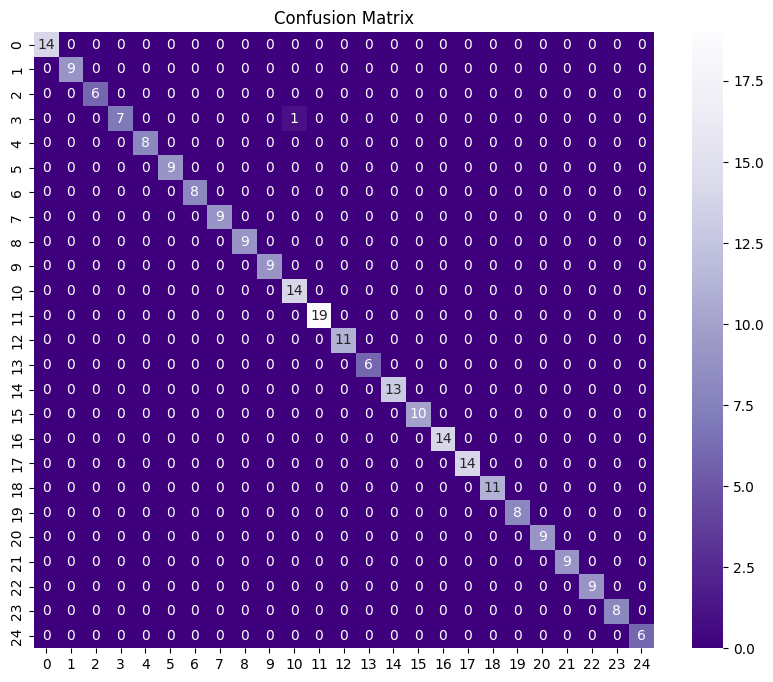

In [171]:
#Random Forest
# Creating a Random Forest model instance
rf=RandomForestClassifier()

# Training the model on the scaled training data
rf.fit(x_train_scaled,y_train_)

# Predicting labels for the scaled test data
y_pred=rf.predict(x_test_scaled)
accuracy_score(y_test_, y_pred)
f1_score(y_test_, y_pred, average='weighted')

# Calculating and printing the accuracy score
print('Random Forest Accuracy:', accuracy_score(y_test_,y_pred))
print('F1 Score:', f1_score(y_test_,y_pred, average='weighted'))

#Plotting the figure
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test_, y_pred), annot=True,fmt='d',cmap='Purples_r')
plt.title('Confusion Matrix')
plt.show()

Random Forest has the accuracy of 99.6%, making it the best out of all the 3 models


# **Discussion**


# 1. Data Preprocessing
The dataset was preprocessed by oversseing numerous steps ofmissing values, unique values, encoding, normalization, numerical features.hese preprocessing steps are crucial for preparing the data for machine learning algorithms and ensuring the model's performance and accuracy.

# 2. Model Seletction
In this project, three models are considered and have provided with different accuracy scores


*   Logistic Regression:76.8%
*   KNN: 4.8%
*   Random Forest: 99.6%

# 3. Model Evaluation
Out of the 3 models tat were conducted, Random Forest model is considered to be the most accurate. Various metrics were performed in order to determine its score

1.   Accuracy score:99.6%
2.   F1 Score: 99.5%
3.   Confusion Matrix :Visual performance of a classification model with both true positives and negatives, and false positives and negatives

# 4. Strengths
Data Collection and Integration: The pipeline has rendered it easier to gather, clean, and integrate a variety of data types, guaranteeing that the information used is accurate and transparent.

Feature engineering: By increasing models' capacity to identify patterns and make accurate predictions, it made it possible to generate and choose useful features from unprocessed data.

Model Selection and Tuning: By establishing a balance between model complexity and precise predictions, the pipeline streamlines the process of choosing models (such as KNN and Random Forest) and fine-tuning their parameters to get the best results.

#5. Limitations
Imbalanced Data: Random Forests can struggle with imbalanced datasets where the class distribution is uneven. Techniques such as class weighting or resampling strategies may be needed to address this limitation effectively.

Conviction of being the best:While the model has shown superiority in comparision other models on metrics such as accuracy, F1-score, or confusion matrix, it suffers from imbalanced data and memory usage

#6. Conclusion
To conclude, the above is the pipeline for e-commerce that determines the upcoming trends in various categories. As stated in the pipeline, the model Random Forest is considered as the best out the 3 models performed. This particular pipeline has succesfull in intergrating data preprocessing, encoding,
model tuning and training to achieve favorable results

